# Análisis exploratiorio de datos (EDA)

In [59]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')

Using matplotlib backend: module://matplotlib_inline.backend_inline


In [412]:
df = pd.read_excel("C:/Users/l/Downloads/JAGAPRO.xlsx", sheet_name = "BIMBO")
df.head(10)

,Fecha_com,Año,Trimestre,Score,EBITDA_INGTR,Ingresos_trimestrales,Utilidad_nt,EBITDA,Margen_utilidad,Deudat,Capital_cont,Crecimiento_ingresos,Score_real
0,2005.1,2005,1,105.843623,0.103477,13288,566,1375,0.043,4046,17852,0.063,1.189267
1,2005.2,2005,2,87.909214,0.121037,13310,606,1611,0.045,3536,17860,0.058,0.000000
2,2005.3,2005,3,135.169124,0.128867,14224,736,1833,0.052,4427,18595,0.070,7.354597
3,2005.4,2005,4,132.802816,0.147725,14791,886,2185,0.060,4230,19853,0.076,12.406662
4,2006.1,2006,1,69.035154,0.098403,14776,658,1454,0.045,3458,20858,0.079,13.111220
5,2006.2,2006,2,82.603360,0.115697,15385,835,1780,0.054,3353,21937,0.095,18.026614
6,2006.3,2006,3,57.823259,0.128753,16155,957,2080,0.059,2572,22980,0.092,21.526248
7,2006.4,2006,4,59.515058,0.140830,16630,971,2342,0.058,2910,23604,0.076,25.687449
8,2007.1,2007,1,63.585683,0.099994,16991,783,1699,0.046,2627,18752,0.100,11.592787
9,2007.2,2007,2,70.783064,0.107208,16967,743,1819,0.044,3186,18771,0.074,12.982003


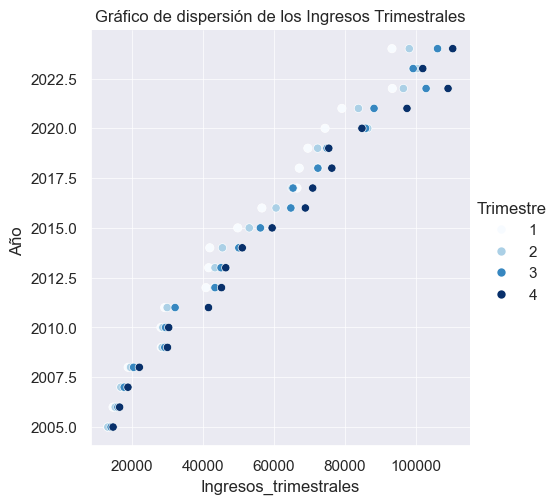

In [300]:
sns.set_theme()
sns.relplot(data = df,
          y = "Año ",
          x = "Ingresos_trimestrales",
          color = "#73B2DA",
          hue = "Trimestre",
           palette = "Blues")
plt.grid(True, linewidth = 0.5)
plt.title("Gráfico de dispersión de los Ingresos Trimestrales", loc = "center");

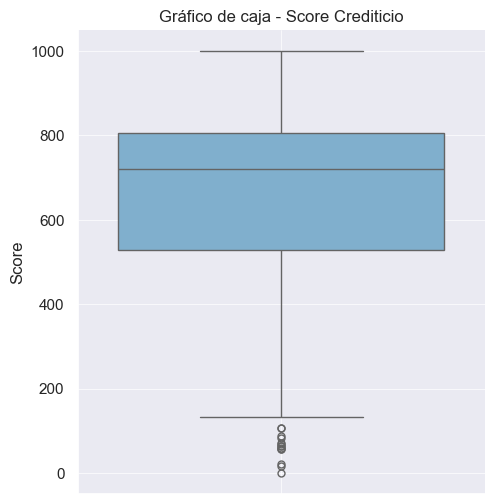

In [302]:
sns.catplot(data = df,
           kind = "box",
           y = "Score",
           color = "#73B2DA")
plt.grid(True, linewidth = 0.5)
plt.title("Gráfico de caja - Score Crediticio", loc = "center");

In [87]:
df.describe()

,Fecha,Score,EBITDA_INGTR,Ingresos_trimestrales,Utilidad_nt,EBITDA,Margen_utilidad,Deudat,Crecimiento_ingresos,Yearop
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,2014.750000,571.447464,0.118616,54802.162500,2111.550000,6663.087500,0.037986,59620.600000,0.110537,69.500000
std,5.803753,55.461132,0.020317,29455.238752,3459.754677,4213.066883,0.032058,39229.680373,0.115211,5.802662
min,2005.100000,477.115473,0.070456,13288.000000,-231.000000,1375.000000,-0.005000,1919.000000,-0.065000,60.000000
25%,2009.925000,529.417505,0.104946,29179.250000,873.250000,3221.500000,0.024000,33169.250000,0.034250,64.750000
50%,2014.750000,576.067316,0.121289,50638.000000,1341.500000,5436.500000,0.036500,63189.500000,0.084000,69.500000
75%,2019.575000,618.088213,0.134336,75670.000000,2406.250000,9480.250000,0.046000,89886.250000,0.150750,74.250000
max,2024.400000,660.718566,0.166667,110312.000000,30234.000000,15640.000000,0.277000,150906.000000,0.465000,79.000000


# Análisis de Componentes principales

In [306]:
df2 = df.drop(["Año ", "Trimestre", "Score_real"], axis = 1)
df2

,Fecha_com,Score,EBITDA_INGTR,Ingresos_trimestrales,Utilidad_nt,EBITDA,Margen_utilidad,Deudat,Capital_cont,Crecimiento_ingresos
0,2005.1,105.843623,0.103477,13288,566,1375,0.043,4046,17852,0.063
1,2005.2,87.909214,0.121037,13310,606,1611,0.045,3536,17860,0.058
2,2005.3,135.169124,0.128867,14224,736,1833,0.052,4427,18595,0.070
3,2005.4,132.802816,0.147725,14791,886,2185,0.060,4230,19853,0.076
4,2006.1,69.035154,0.098403,14776,658,1454,0.045,3458,20858,0.079
...,...,...,...,...,...,...,...,...,...,...
75,2023.4,611.387912,0.134252,101883,3260,13678,0.032,109935,111628,-0.065
76,2024.1,759.992758,0.127064,93221,2370,11845,0.025,128391,110623,-0.030
77,2024.2,795.216228,0.142251,98087,3320,13953,0.034,135495,116668,0.005
78,2024.3,824.118037,0.147483,106046,3695,15640,0.035,145636,127715,0.074


In [308]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df2)

In [312]:
pca = PCA(n_components = .8)
df_pca = pca.fit_transform(df_scaled)
df_pca.shape

(80, 3)

In [314]:
explained_variance = pca.explained_variance_ratio_.round(4)
explained_variance

array([0.5643, 0.2063, 0.1237])

In [316]:
#Definimos la varianza explicada acumulada
cumulative_variance = np.cumsum(explained_variance)
cumulative_variance

array([0.5643, 0.7706, 0.8943])

In [318]:
#Definimos el tamaño de la varianza explicada
x_range = np.arange(1, len(explained_variance)+1)
x_range

array([1, 2, 3])

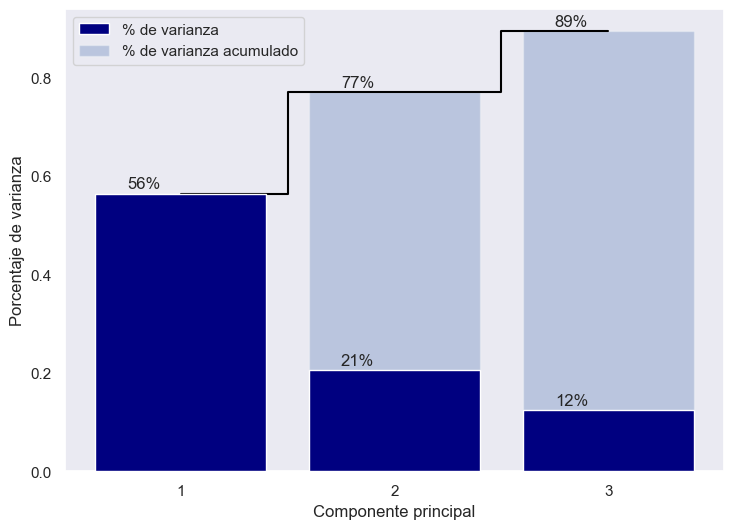

In [320]:
fig, ax = plt.subplots(figsize = (8.5, 6))
ax.bar(x = x_range, height = explained_variance, zorder = 20,
       color = "navy", label = "% de varianza")
ax.bar(x = x_range, height = cumulative_variance, alpha = 0.3,
       label = "% de varianza acumulado")
ax.step(x = x_range, y = cumulative_variance, where = "mid",color="black")
ax.set_xlabel("Componente principal")
ax.set_ylabel("Porcentaje de varianza")
for i, v in enumerate(explained_variance):
    ax.text(x = i + .75, y = v + 0.01, s = str(round(v * 100)) + "%")
for i, v in enumerate(cumulative_variance[1:], start = 1):
    ax.text(x = i + .75, y = v + 0.01, s = str(round(v * 100)) + "%")
ax.set_xticks(x_range, labels = x_range)
plt.grid(False)
ax.legend();

In [322]:
pca_opt = PCA(n_components=3)  
df_pca_opt = pca_opt.fit_transform(df)  

# Convertimos de nuevo a DataFrame para análisis
df_pca_final = pd.DataFrame(df_pca_opt, columns=[f"PC{i+1}" for i in range(3)])
print(df_pca_final.head())
df_pca_final.head(6).style.set_caption("Vista Previa de los Datos").background_gradient(cmap="Blues")

            PC1          PC2         PC3
0 -82929.860318   165.569450  681.343024
1 -83240.303561  -250.214852  706.408984
2 -81766.690751  -408.458610  846.414093
3 -80911.550043 -1456.410166  439.623063
4 -80957.623408 -2336.290413 -138.763381


,PC1,PC2,PC3
0,-82929.860318,165.569450,681.343024
1,-83240.303561,-250.214852,706.408984
2,-81766.690751,-408.458610,846.414093
3,-80911.550043,-1456.410166,439.623063
4,-80957.623408,-2336.290413,-138.763381
5,-80116.188342,-3257.787026,-411.961321


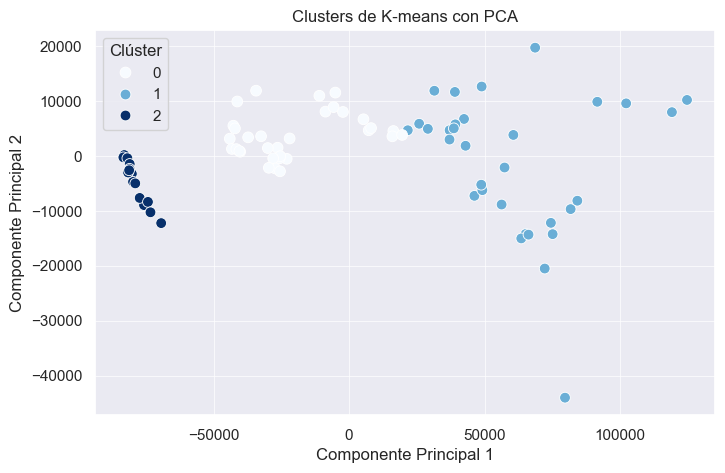

In [324]:
k_opt = 3 # Cambia esto según los gráficos anteriores
kmeans = KMeans(n_clusters=k_opt, random_state=42, n_init=10)
df_pca_final["Cluster"] = kmeans.fit_predict(df_pca_final)

plt.figure(figsize=(8,5))
sns.scatterplot(x=df_pca_final["PC1"], y=df_pca_final["PC2"], hue=df_pca_final["Cluster"], palette="Blues", s=60)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Clusters de K-means con PCA")
plt.legend(title="Clúster", loc = "best")
plt.grid(True, linewidth = 0.5);

In [326]:
pca_components = pd.DataFrame(pca_opt.components_, columns=df.columns, index=[f"PC{i+1}" for i in range(3)])
pcavalor = pca_components.drop(["Año ", "Trimestre"], axis = 1)
pcavalor.style.set_caption("Vista Previa de los Datos").background_gradient(cmap="Blues")

,Fecha_com,Score,EBITDA_INGTR,Ingresos_trimestrales,Utilidad_nt,EBITDA,Margen_utilidad,Deudat,Capital_cont,Crecimiento_ingresos,Score_real
PC1,0.000100,0.003484,0.000000,0.505668,0.024011,0.069603,-0.000000,0.672873,0.534869,-0.000000,0.004866
PC2,-0.000038,0.012676,-0.000001,-0.444321,-0.245135,-0.106171,-0.000002,0.720065,-0.461042,-0.000000,-0.001074
PC3,0.000111,0.006979,-0.000002,0.730191,-0.249700,0.021035,-0.000003,-0.037699,-0.634475,-0.000000,0.000012


In [292]:
pca_components.to_excel("C:/Users/l/Downloads/pcaloadings.xlsx", index = True)

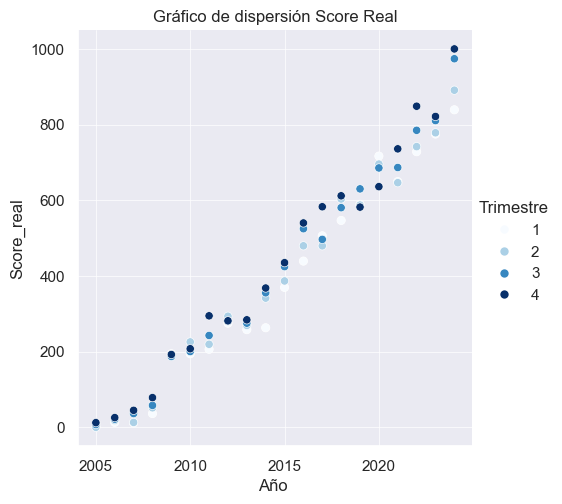

In [342]:
sns.relplot(data = df,
          x = "Año ",
          y = "Score_real",
          color = "#73B2DA",
          hue = "Trimestre",
           palette = "Blues")
plt.grid(True, linewidth = 0.5)
plt.title("Gráfico de dispersión Score Real", loc = "center");

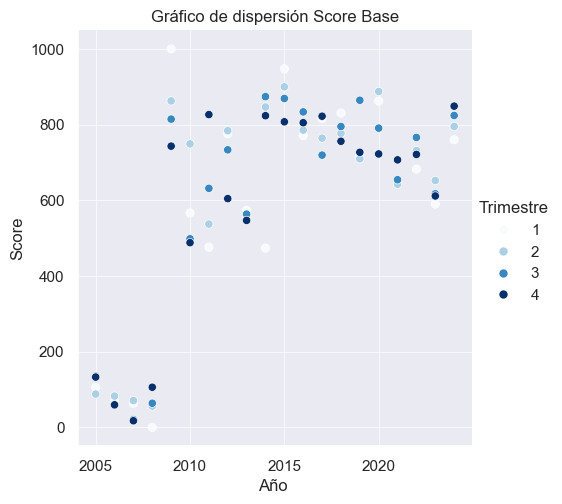

In [346]:
sns.relplot(data = df,
          x = "Año ",
          y = "Score",
          color = "#73B2DA",
          hue = "Trimestre",
           palette = "Blues")
plt.grid(True, linewidth = 0.5)
plt.title("Gráfico de dispersión Score Base", loc = "center");

# Proceso de simulación

In [548]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [550]:
BASE = pd.read_excel("C:/Users/l/Downloads/DS.xlsx")
BASE.head(6)

,ingresos,utiildad,deuda,capital
0,13288,566,4046,17852
1,13310,606,3536,17860
2,14224,736,4427,18595
3,14791,886,4230,19853
4,14776,658,3458,20858
5,15385,835,3353,21937


In [552]:
# Seleccionamos columnas relevantes (ajustamos espacios)
data = BASE[["deuda", "ingresos", "utiildad", "capital "]].copy()

In [554]:
# Cálculo del score sin escalar
def score_sin_escala(row):
    return (
        (row['deuda'] * 0.272 +
         row['ingresos'] * 0.319 +
         row['capital '] * 0.31 +
         row['utiildad'] * 0.099) * 100
    )

BASE['score_raw'] = BASE.apply(score_sin_escala, axis=1)

In [556]:
# Valores mínimo y máximo del score original
score_min = BASE['score_raw'].min()
score_max = BASE['score_raw'].max()

In [558]:
# Función para calcular el score ya escalado a un rango de 0 a 1000
def calcular_score(row):
    raw = (
        (row['deuda'] * 0.272 +
         row['ingresos'] * 0.319 +
         row['capital '] * 0.31 +
         row['utiildad'] * 0.099) * 100
    )
    return (raw - score_min) / (score_max - score_min) * 1000

# Simulación Bootstrap

In [564]:
n_simulaciones = 1000
scores_simulados = []

for _ in range(n_simulaciones):
    muestra = data.sample(n=len(data), replace=True)
    scores = muestra.apply(calcular_score, axis=1)
    scores_simulados.append(scores.mean())

# Resultados estadísticos
scores_simulados = np.array(scores_simulados)
media = np.mean(scores_simulados)
intervalo = np.percentile(scores_simulados, [2.5, 97.5])

print("Promedio del score simulado:", round(media, 2))
print("Intervalo de confianza al 95%:", [round(intervalo[0], 2), round(intervalo[1], 2)])

Promedio del score simulado: 403.81
Intervalo de confianza al 95%: [343.52, 468.39]


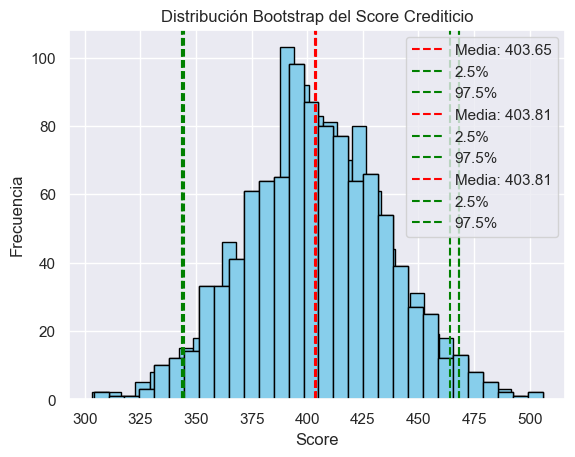

In [568]:
# Visualización de la distribución bootstrap
plt.hist(scores_simulados, bins=30, color='skyblue', edgecolor='black')
plt.axvline(media, color='red', linestyle='--', label=f'Media: {round(media, 2)}')
plt.axvline(intervalo[0], color='green', linestyle='--', label='2.5%')
plt.axvline(intervalo[1], color='green', linestyle='--', label='97.5%')
plt.title('Distribución Bootstrap del Score Crediticio')
plt.xlabel('Score')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

# Análisis de sensibilidad

In [570]:
referencia = data.mean()
multiplicadores = np.linspace(0.5, 1.5, 100)
resultados = {}

def calcular_score_valores(deuda, ingresos, capital, utiildad):
    raw = (
        (deuda * 0.272 +
         ingresos * 0.319 +
         capital * 0.31 +
         utiildad * 0.099) * 100
    )
    return (raw - score_min) / (score_max - score_min) * 1000

for variable in ['deuda', 'ingresos', 'capital ', 'utiildad']:
    scores = []
    for m in multiplicadores:
        vars_temp = referencia.copy()
        vars_temp[variable] *= m
        s = calcular_score_valores(
            deuda=vars_temp['deuda'],
            ingresos=vars_temp['ingresos'],
            capital=vars_temp['capital '],
            utiildad=vars_temp['utiildad']
        )
        scores.append(s)
    resultados[variable] = scores

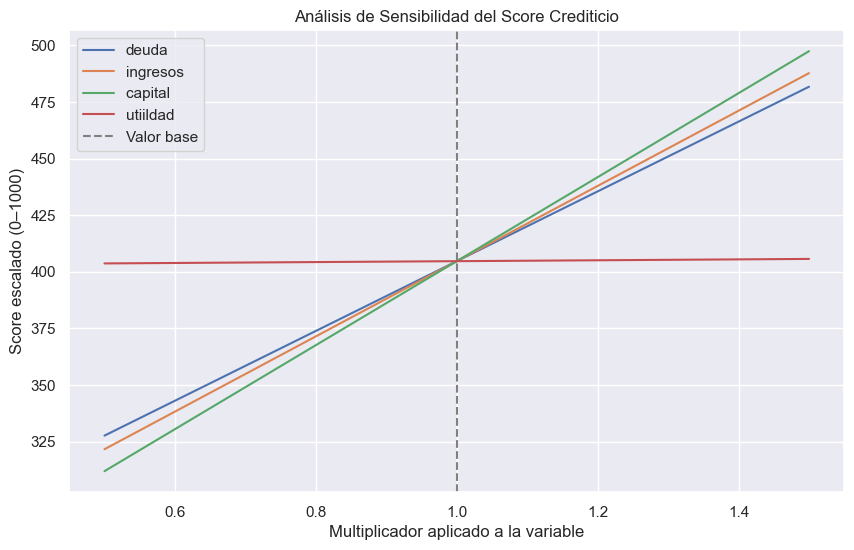

In [572]:
# Gráfica del análisis de sensibilidad
plt.figure(figsize=(10, 6))
for variable, scores in resultados.items():
    plt.plot(multiplicadores, scores, label=variable)

plt.title("Análisis de Sensibilidad del Score Crediticio")
plt.xlabel("Multiplicador aplicado a la variable")
plt.ylabel("Score escalado (0–1000)")
plt.axvline(1.0, color='gray', linestyle='--', label='Valor base')
plt.legend()
plt.grid(True)
plt.show()

# Simulación Monte Carlo

In [575]:
from scipy.stats import weibull_min, fisk

In [577]:
n_sim = 100

# Generación de valores aleatorios con parámetros ajustados
deuda_sim = weibull_min.rvs(c=1.231098, scale=62956.48, size=n_sim)
ingresos_sim = weibull_min.rvs(c=1.976144, scale=61975.01, size=n_sim)
capital_sim = fisk.rvs(c=3.076775, scale=56451.54, size=n_sim)
utiildad_sim = fisk.rvs(c=1.994697, scale=1399.162, size=n_sim)

# Armado del DataFrame simulado
sim_df = pd.DataFrame({
    'deuda': deuda_sim,
    'ingresos': ingresos_sim,
    'capital': capital_sim,
    'utiildad': utiildad_sim
})

# Cálculo del score bruto
sim_df['score_raw'] = (
    (sim_df['deuda'] * 0.272 +
     sim_df['ingresos'] * 0.319 +
     sim_df['capital'] * 0.31 +
     sim_df['utiildad'] * 0.099) * 100
)

# Normalización del score entre 0 y 1000
score_min = sim_df['score_raw'].min()
score_max = sim_df['score_raw'].max()
sim_df['score'] = ((sim_df['score_raw'] - score_min) / (score_max - score_min)) * 1000

# Estadísticas de la simulación
media_score = sim_df['score'].mean()
intervalo_95 = np.percentile(sim_df['score'], [2.5, 97.5])

print("Promedio del score simulado (Monte Carlo):", round(media_score, 2))
print("Intervalo de confianza al 95%:", [round(intervalo_95[0], 2), round(intervalo_95[1], 2)])

Promedio del score simulado (Monte Carlo): 378.63
Intervalo de confianza al 95%: [20.82, 883.91]


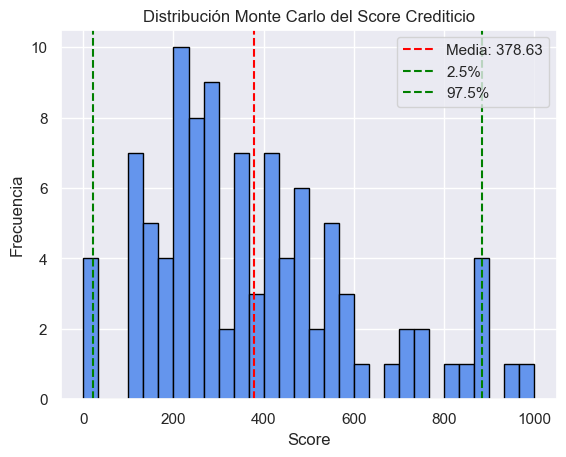

In [579]:
# Gráfica de la distribución simulada
plt.hist(sim_df['score'], bins=30, color='cornflowerblue', edgecolor='black')
plt.axvline(media_score, color='red', linestyle='--', label=f'Media: {media_score:.2f}')
plt.axvline(intervalo_95[0], color='green', linestyle='--', label='2.5%')
plt.axvline(intervalo_95[1], color='green', linestyle='--', label='97.5%')
plt.title('Distribución Monte Carlo del Score Crediticio')
plt.xlabel('Score')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Guardar la base simulada en archivo Excel y descargarla
nombre_archivo = 'base_simulada_score.xlsx'
sim_df.to_excel(nombre_archivo, index=False)
files.download(nombre_archivo)

# Modelo de Machine Learning

In [388]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [432]:
df.columns

Index(['Fecha_com', 'Año ', 'Trimestre', 'Score', 'EBITDA_INGTR',
       'Ingresos_trimestrales', 'Utilidad_nt', 'EBITDA', 'Margen_utilidad',
       'Deudat', 'Capital_cont', 'Crecimiento_ingresos', 'Score_real'],
      dtype='object')

In [448]:
y = df["Score_real"]
X = df[['Ingresos_trimestrales', 'Utilidad_nt','Deudat', 'Capital_cont']]

In [450]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [452]:
model = LinearRegression()
model.fit(X_train, y_train)  

LinearRegression()

In [454]:
y_pred = model.predict(X_test)
print(f"Coeficientes: {model.coef_}")
print(f"Intercepto: {model.intercept_}")
print(f"Error cuadrático medio (MSE): {mean_squared_error(y_test, y_pred)}")
print(f"Coeficiente de determinación R^2: {r2_score(y_test, y_pred)}")

Coeficientes: [0.00302866 0.00093993 0.00258243 0.00294321]
Intercepto: -102.57836631756618
Error cuadrático medio (MSE): 5.870138636218262e-26
Coeficiente de determinación R^2: 1.0


In [484]:
# Mostrar importancia de variables (pesos relativos)
features = X.columns
coefficients = model.coef_
importance = pd.DataFrame({'Variable': features, 'Coeficiente': coefficients})
importance = importance.sort_values(by='Coeficiente', key=abs, ascending=False)
print("\nImportancia de variables:")
pd.DataFrame(importance)


Importancia de variables:


,Variable,Coeficiente
0,Ingresos_trimestrales,0.003029
3,Capital_cont,0.002943
2,Deudat,0.002582
1,Utilidad_nt,0.000940


In [460]:
sim = pd.read_excel("C:/Users/l/Downloads/basesimulada.xlsx")
sim2 = sim.drop("Score_real", axis = 1)
sim2.head(6)

,Ingresos_trimestrales,Utilidad_nt,Deudat,Capital_cont
0,57779.553378,2557.949697,238352.830344,58704.311364
1,53300.067675,1504.835624,18845.016051,36312.080371
2,15108.540892,391.507489,18556.357463,46047.833461
3,67444.493662,378.767950,16869.558518,80114.909338
4,40693.651693,731.107904,30316.284053,90779.735287
5,30204.712956,215.382296,61871.515616,76262.660770


In [506]:
predicciones = model.predict(sim2)
pred = pd.DataFrame(predicciones)
pred

,0
0,863.130136
1,215.804156
2,126.997445
3,381.404017
4,366.830063
...,...
95,605.290496
96,578.383603
97,798.828531
98,244.934528


In [472]:
pred.to_excel("C:/Users/l/Downloads/resulscore.xlsx", index = True)

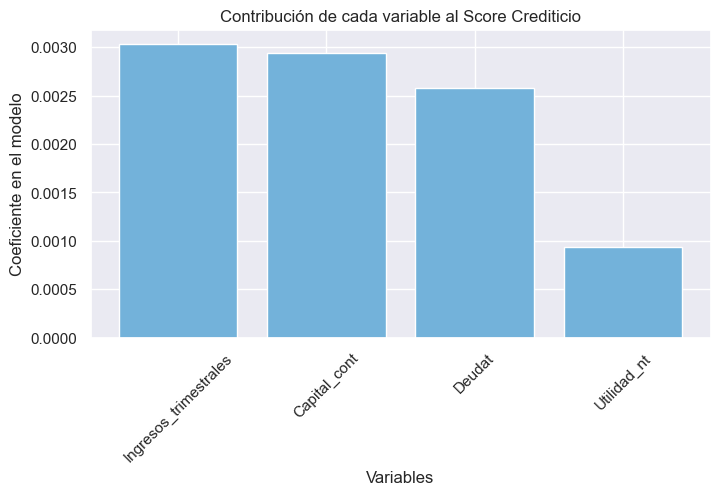

In [486]:
# 8. Visualización (opcional)
plt.figure(figsize=(8, 4))
plt.bar(importance['Variable'], importance['Coeficiente'], color = "#73B2DA")
plt.title('Contribución de cada variable al Score Crediticio')
plt.xlabel('Variables')
plt.ylabel('Coeficiente en el modelo')
plt.xticks(rotation=45)
plt.show()

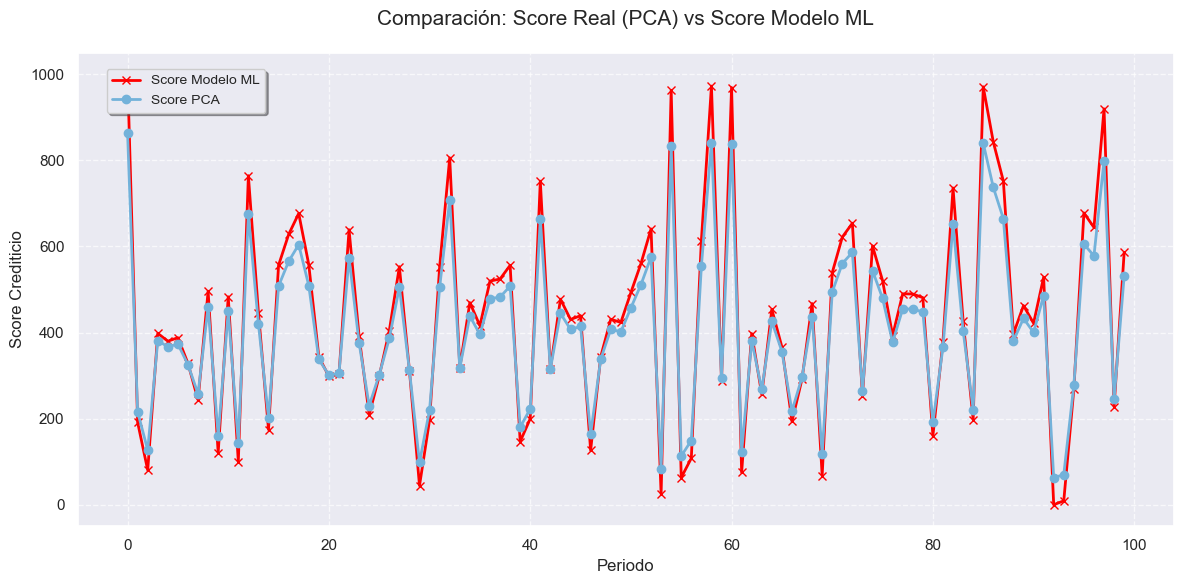

In [542]:
plt.figure(figsize=(12, 6))
plt.plot(sim.index, sim['Score_real'], label='Score Modelo ML', marker='x', color='red', linewidth=2)
plt.plot(pred.index, pred, label='Score PCA', marker='o', color='#73B2DA', linewidth=2)
plt.title('Comparación: Score Real (PCA) vs Score Modelo ML', fontsize=15, pad=20)
plt.xlabel('Periodo', fontsize=12)
plt.ylabel('Score Crediticio', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc="upper left", bbox_to_anchor=(0.02, 0.98), fontsize=10, 
           framealpha=1, shadow=True)
plt.tight_layout()
plt.show()